<a href="https://colab.research.google.com/github/larissa-rangel/MO443-processamento-de-imagem-digital/blob/main/MO443_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRABALHO 3 - OPERADORES MORFOLÓGICOS**
# *Disciplina: MO443    Professor: Hélio Pedrini*

O objetivo deste trabalho e aplicar operadores morfológicos para segmentar regiões compreendendotexto e
não texto em uma imagem de entrada.

Fontes:
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32

https://medium.com/swlh/image-processing-with-python-connected-components-and-region-labeling-3eef1864b951

https://pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

255 0
(1374, 2233) uint8


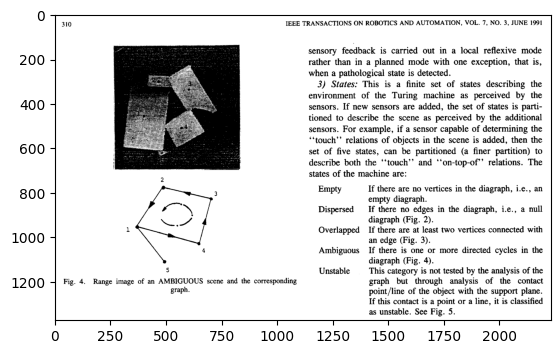

255 0
(1374, 2233) uint8


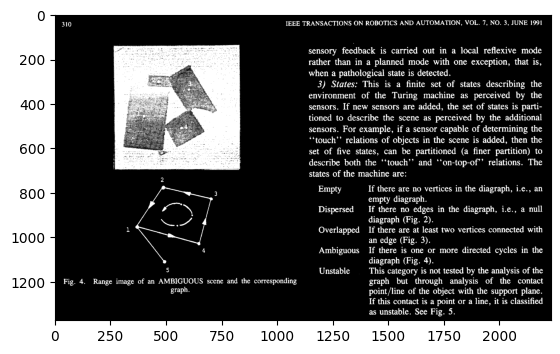

In [ ]:
#Realizar a leitura da image
img_origin = cv2.imread('/content/drive/MyDrive/Unicamp/23.1/Introdução ao processamento de imagens/Trabalho3/bitmap.pbm',cv2.IMREAD_GRAYSCALE)
##obs: No open cv a dilatação dilata os pixels brancos, para isso foi preciso inverter a imagem para trabalhar com a biblioteca
img = abs(255 - img_origin)
#Imprimir a imagem e as dimensões
plt.imshow(img_origin, cmap='gray')
print(img_origin.max(), img_origin.min())
print(img_origin.shape, img_origin.dtype)
plt.show()
plt.imshow(img, cmap='gray')
print(img.max(), img.min())
print(img.shape, img.dtype)
plt.show()
caminho  = '/content/drive/MyDrive/Unicamp/23.1/Introdução ao processamento de imagens/Trabalho3'

##(1) Dilatação da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura


(1374, 2233) uint8


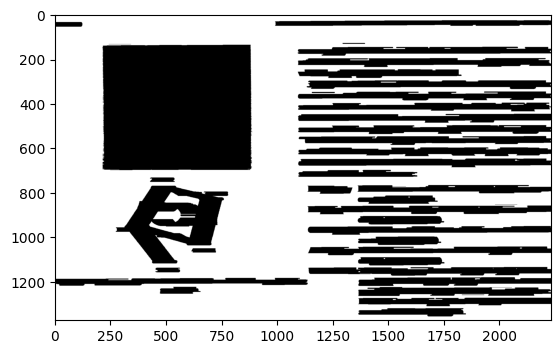

In [ ]:
StrElement1 = np.ones((1,100),dtype=np.uint8)
dilation = cv2.dilate(img,StrElement1,anchor=(-1,-1))
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(dilation), cmap='gray')#desinverter a imagem
print(dilation.shape, dilation.dtype)
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo1.png', dpi=300, bbox_inches='tight')
plt.show()

## (2) Erosão da imagem resultante com o mesmo elemento estruturante do passo (1)

(1374, 2233) uint8


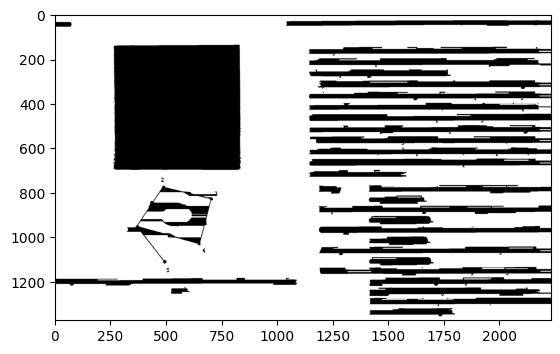

In [ ]:
erosion = cv2.erode(dilation,StrElement1,anchor=(-1,-1)) #origem do elemento estruturante centralizada
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(erosion), cmap='gray')
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo2.png', dpi=300, bbox_inches='tight')
print(erosion.shape, dilation.dtype)
plt.show()

## (3) Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura;

(1374, 2233) uint8


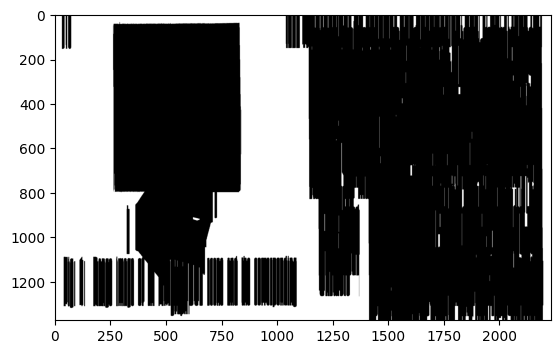

In [ ]:
StrElement2 = np.ones((200,1),dtype=np.uint8)
dilation2 = cv2.dilate(img,StrElement2,anchor=(-1,-1))
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(dilation2), cmap='gray')
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo3.png', dpi=300, bbox_inches='tight')
print(dilation2.shape, dilation2.dtype)
plt.show()

## (4) Erosão da imagem resultante com o mesmo elemento estruturante do passo (3);

(1374, 2233) uint8


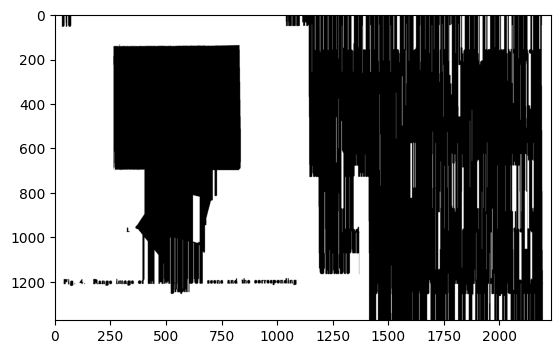

In [ ]:
erosion2 = cv2.erode(dilation2,StrElement2,anchor=(-1,-1))
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(erosion2), cmap='gray')
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo4.png', dpi=300, bbox_inches='tight')
print(erosion2.shape, erosion2.dtype)
plt.show()

## (5) Aplicação da intersecção (AND) dos resultados dos passos (2) e (4);

(1374, 2233) uint8


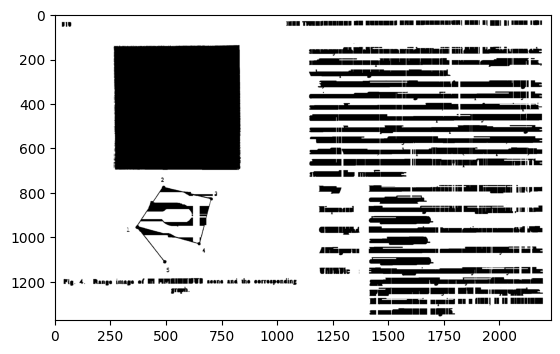

In [ ]:
intersection = erosion & erosion2 #realiza a operação bit a bit
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(intersection), cmap='gray')
print(intersection.shape, intersection.dtype)
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo5.png', dpi=300, bbox_inches='tight')
plt.show()

## (6) Fechamento do resultado obtido no passo (5) com um elemento estruturante de 1 pixel de altura e 30 pixels de largura;

(1374, 2233) uint8


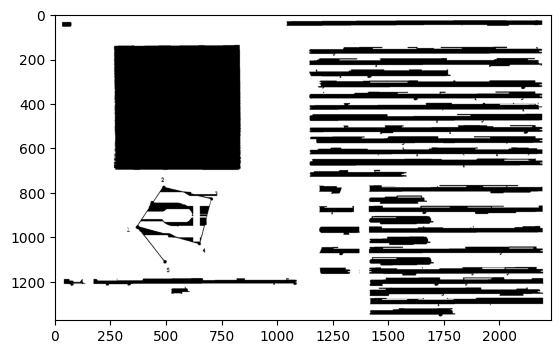

In [ ]:
StrElement3 = np.ones((1,30))
closing = cv2.morphologyEx(intersection, cv2.MORPH_CLOSE, StrElement3,anchor=(-1,-1))
#Imprimir a imagem e as dimensões
plt.imshow(np.logical_not(closing), cmap='gray')
print(closing.shape, closing.dtype)
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo6.png', dpi=300, bbox_inches='tight')
plt.show()

## (7) Aplicação de algoritmo para identificação de componentes conexos sobre o resultado do passo (6);

In [ ]:
img_connected = cv2.threshold(closing, 127, 1, cv2.THRESH_BINARY)[1]
num_labels,labels,stats,centroids = cv2.connectedComponentsWithStats(img_connected,4)
print('Número de componentes conexos é:',num_labels-1)

Número de componentes conexos é: 53


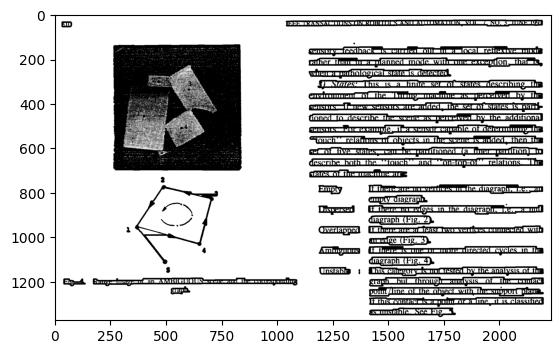

In [ ]:
contours,_= cv2.findContours(img_connected , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
copy = np.copy(img_origin)
cv2.drawContours(copy, contours, -1,(0,128,0),5)
plt.imshow(copy,cmap='gray')
# Salvar a figura em formato PNG com alta qualidade
plt.savefig(caminho+'/'+'passo7.png', dpi=300, bbox_inches='tight')
plt.show()

## (8) Para cada retangulo envolvendo um objeto, calcule:
#(a) razao entre o número de pixels pretos (branco) e o número total de pixels (altura × largura);



#(b) razao entre o número de transições verticais e horizontais branco para preto (preto p/ branco) e o numero total de pixels pretos (brancos);

In [ ]:
import pandas as pd
df = pd.DataFrame(data=stats,columns=['x','y','largura','altura','area'])
df.to_csv('matriz_stats.csv',index=False)
df.head()

,x,y,largura,altura,area
0,0,0,2233,1374,2177519
1,1039,28,1150,25,24201
2,32,36,42,21,866
3,1343,131,2,3,4
4,264,139,572,561,315070


In [ ]:
count = 0
transV = 0
transH = 0
pixels = np.zeros((len(stats)))
transitions = np.zeros((len(stats)))

for i in range (0,len(stats),1):
  rect = img_connected[stats[i,1]:stats[i,1]+stats[i,3],stats[i,0]:stats[i,0]+stats[i,2]]
  #print(np.size(rect))
  for k in range(rect.shape[0]):
    transV = transV + np.count_nonzero(rect[k,:-1]<rect[k,1:])
    for l in range(rect.shape[1]):
      transH = transH + np.count_nonzero(rect[:-1,l]<rect[1:,l])
      if  rect[k,l] == 1:
        count =+1

  pixels[i] = (count)/np.size(rect)
  transitions[i] = (transH+transV)/np.count_nonzero(rect)

df = pd.DataFrame(pixels)
df.to_excel('matriz_pixels.xlsx',index=False)
df.head()
df = pd.DataFrame(transitions)
df.to_excel('matriz_transitions.xlsx',index=False)
df.head()



,0
0,4.395482e+01
1,1.618517e+03
2,4.523071e+04
3,9.792450e+06
4,1.263757e+02


# (9) criação de uma regra para classificar cada componente conexo, de acordo com as medidas obtidas no passo (8), como texto e não texto.

Na imagem as regiões que representam o texto são caracterizadas por uma razãoentre o nº de pixels pretos e o nº total de pixels baixa, pois o contorno não é perfeito e pega algumas partes do fundo, enquanto que nas regiões que tem figuras a mesma razão é alta (ou próximo de 1), porque o contorno funciona melhor em formatos quadrados. Já no que diz respeito as transições, os textos tem muitas transições enquanto que as figuras tem poucas transições já que são um bloco quase que único.

In [ ]:
coutourn_types = []
mediapx = np.mean(pixels)
#mediatr = np.mean(transitions)
for i in range(len(pixels)):
  if pixels[i] <= mediapx:
    coutourn_types.insert(i,"Texto")
  else:
    coutourn_types.insert(i,"Nao Texto")

print(coutourn_types)

df = pd.DataFrame(coutourn_types)
df.to_excel('matriz_coutourn_types.xlsx')
df.head()

['Texto', 'Texto', 'Texto', 'Nao Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Nao Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Texto', 'Nao Texto', 'Nao Texto', 'Texto', 'Texto', 'Nao Texto', 'Texto', 'Texto', 'Texto', 'Nao Texto', 'Nao Texto', 'Texto', 'Texto']


,0
0,Texto
1,Texto
2,Texto
3,Nao Texto
4,Texto


A razão entre o nº de pixels pretos e o nº total de pixels é:
 [3.25930156e-07 3.47826087e-05 1.13378685e-03 1.66666667e-01
 3.11631328e-06 2.39005736e-05 2.39005736e-05 4.03160781e-05
 2.54627861e-05 2.38777459e-05 5.00000000e-02 2.51825737e-05
 5.00000000e-02 2.39005736e-05 2.39005736e-05 2.39463602e-05
 2.45134088e-05 2.45134088e-05 7.41564702e-05 4.16666667e-03
 3.46500347e-05 7.80743736e-06 2.72331155e-04 1.03551828e-04
 1.00000000e+00 3.36949929e-05 1.72146669e-04 2.08333333e-02
 9.07441016e-05 4.27350427e-05 4.00000000e-02 1.51791135e-04
 4.38596491e-03 9.60430273e-05 3.36949929e-05 1.49320591e-04
 4.78468900e-03 9.35191247e-05 4.00000000e-02 3.28310187e-05
 3.96825397e-03 2.49875062e-04 1.42857143e-01 1.42857143e-01
 3.27890353e-05 3.31543001e-05 8.33333333e-02 3.47222222e-04
 3.88651380e-04 3.28731098e-05 1.00000000e+00 5.00000000e-01
 3.37381916e-05 7.03828829e-05]
(54,)


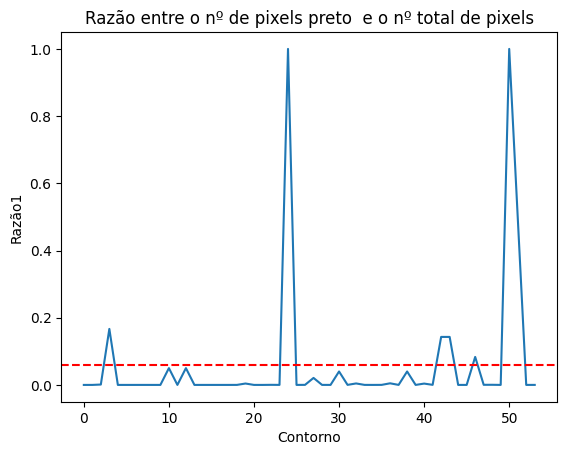

In [ ]:
print("A razão entre o nº de pixels pretos e o nº total de pixels é:\n",pixels)
print(pixels.shape)
plt.plot(np.arange(0,len(pixels),1),pixels)
plt.title("Razão entre o nº de pixels preto  e o nº total de pixels")
plt.xlabel('Contorno')
plt.ylabel('Razão1')
plt.axhline(mediapx, color='r', linestyle='--', label='Média')
plt.savefig(caminho+'/'+'passo8a.png', dpi=300, bbox_inches='tight')
plt.show()

# (10) aplicação de operadores morfológicos apropriados para segmentar cada linha do texto em blocos de palavras. Coloque um retangulo envolvendo cada palavra na imagem original. Calcule o número total de linhas de texto e de blocos de palavras na imagem.



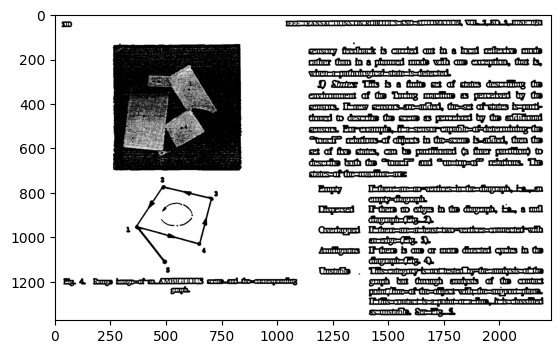

In [ ]:
StrElement4 = np.ones((1,20))
img_bin = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)[1]
copy1 = np.copy(img_origin)
contours_list = []
for i in range (1,len(stats),1):
  rect = img_bin[stats[i,1]:stats[i,1]+stats[i,3],stats[i,0]:stats[i,0]+stats[i,2]] #resultado do fechamento já binarizada
  #aplicando os operadores morfológicos
  dilatada = cv2.dilate(img_bin, StrElement4)
  erodida = cv2.erode(dilatada,StrElement4)
  contours1,_= cv2.findContours(erodida, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(copy1, contours1, -1,(0,128,0),5)


plt.imshow(copy1,cmap='gray')
plt.savefig(caminho+'/'+'passo10.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
num_labels1,_,stats1,_ = cv2.connectedComponentsWithStats(erodida,4)
print('Número total de palavras é:',num_labels1-1)
print('Número total de linhas é:',coutourn_types.count('Texto'))

Número total de palavras é: 203
Número total de linhas é: 47
